# Minería de grafos aplicada a redes sociales

## Uso de funciones especiales y módulos

### Adding & editing graph nodes

We'll first take a look at creating a graph, and adding/editing nodes:

In [16]:
import networkx as nx

'''use g = nx.Graph() to create a graph'''

g = nx.Graph()

'''Lesson: use .add_node(1) to add a single node'''

# TODO: add a node
g.add_node(2)
'''Lesson: use .add_nodes_from([2, 3, 'four', 5])  to add in bulk'''

# TODO: add multiple nodes
g.add_nodes_from([1,2,3,'four',5])

g.nodes()  # run g.nodes() to view the graph

NodeView((2, 1, 3, 'four', 5))

In [17]:
'''Note that NetworkX won't complain if we re-add pre-existing nodes'''

# TODO: try re-adding nodes to see what happens
g.add_node(1)

g.nodes()  # display nodes

NodeView((2, 1, 3, 'four', 5))

In [18]:
'''Lesson: remove syntax is similar to adding, eg:
        .remove_node()
        .remove_nodes_from()
'''

# TODO: try removing both 1) single nodes, 2) nodes in bulk

g.remove_nodes_from([1,2])

g.nodes()  # display nodes

NodeView((3, 'four', 5))

### Adding & editing edges

In [19]:
h = nx.Graph()  # let's create a 2nd graph to play with edges

'''Lesson: to create an edge, just specify the 2 nodes that define it: 
        .add_edge('a','b')
    Note that those nodes also get added (no need to make them beforehand!)
'''

# TODO: create an edge

h.add_edge('a','b')

print('edges:', h.edges())  # see your new edge
print('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b')]
nodes: ['a', 'b']


In [20]:
'''Lesson: adding multiple edges is similar to adding multiple nodes:
        .add_edges_from([('x','y'), ('y','z')])
'''

# TODO: create multiple new edges

h.add_edges_from([('a','c'),('a','d')])


print('edges:', h.edges()) # see your new edge
print('nodes:', h.nodes())  # verify that new nodes were also added

edges: [('a', 'b'), ('a', 'c'), ('a', 'd')]
nodes: ['a', 'b', 'c', 'd']


### Visualizing graphs

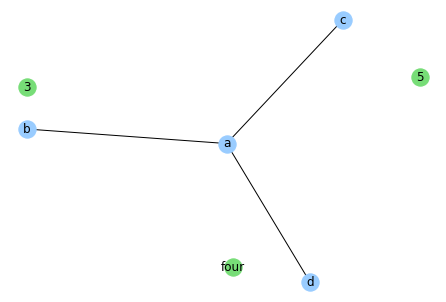

In [21]:
# we need this 'magic' command to draw graphs inline
%matplotlib inline  

GREEN = "#77DD77"
BLUE = "#99CCFF"

nx.draw(g, node_color=GREEN, with_labels=True)
nx.draw(h, node_color=BLUE, with_labels=True)

# TODO: nothing to write, just run this :)


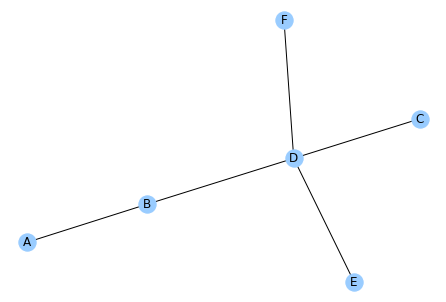

In [22]:
g=nx.Graph()

g.add_edges_from([('A','B'),('B','D'),('D','F'),('D','E'),('D','C')])
nx.draw(g,node_color=BLUE,with_labels=True)


### Directed Graphs

directed edges: [(1, 2), (2, 3)]


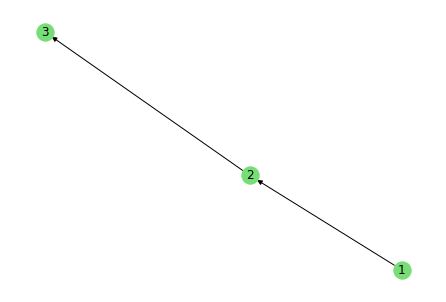

In [23]:
'''Lesson: use nx.DiGraph() to create a new directed graph
'''

# TODO: create a directed graph
dg = nx.DiGraph()

dg.add_edges_from([(1,2), (2,3)])

# TODO: run this cell, you should see 2 directed edges

print('directed edges:', dg.edges())
nx.draw(dg, node_color=GREEN, with_labels=True)


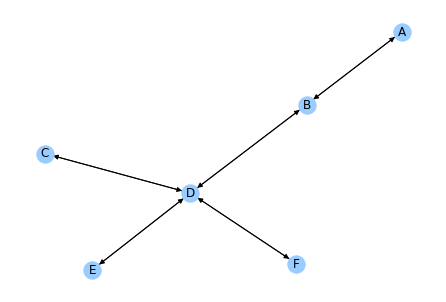

In [24]:
'''We can make directed graphs from existing graphs, eg:
        nx.DiGraph(g)
'''

# TODO: create a directed graph from g
dg = nx.DiGraph(g)

nx.draw(dg, node_color=BLUE, with_labels=True)

In [25]:
''' Notice that nodes A and B have TWO directed edges:
        A -> B
        B -> A
'''

# TODO: run dg.edges() to confirm that each node pair has TWO directed edges
dg.edges()

OutEdgeView([('A', 'B'), ('B', 'A'), ('B', 'D'), ('D', 'B'), ('D', 'F'), ('D', 'E'), ('D', 'C'), ('F', 'D'), ('E', 'D'), ('C', 'D')])

### Adding attributes to nodes and edges

Sometimes you may want to attach attributes to either the nodes or edges:

* Perhaps you want to save node properties that will be helpful with future analysis
* Perhaps you want to attach visual descriptions, such a node size, edge width or graph color

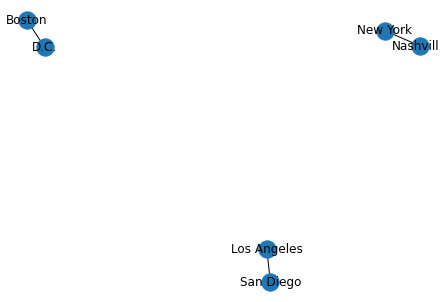

In [26]:
cities = nx.Graph()

cities.add_edge('San Diego', 'Los Angeles', length= 0.4)
cities.add_edge('New York', 'Nashville', length= 5.6)
cities.add_edge('Boston', 'D.C.', length= 0.8)

nx.draw(cities, with_labels=True)

# Describing a Network

### Degree Distribution:



<img src="../materials/images/graph.png" style="float:left; padding-right:20px;" width="200" />

- 1 node with 4 edges
- 1 node with 2 edges
- 4 nodes with 1 edge

Distribution:

    [(1:4), (1:2), (4:1)]


In [27]:
# Degree Distribution for all nodes
print('Degree Distribution:', g.degree())

Degree Distribution: [('A', 1), ('B', 2), ('D', 4), ('F', 1), ('E', 1), ('C', 1)]


<img src="../materials/images/graph-paths.png" style="float:left;" width="600" />

In [28]:
# Generate the graph above
paths = nx.Graph()
paths.add_edges_from([
    ('A','B'), ('B','D'), ('B','C'), ('D','E'), ('D','C'),
    ('C','1'), ('1','2'), ('1','3'), ('2','3'), 
    ('E','2'), ('E','4')])

# Display average shortest path details
print('Avg shortest path from A to E is', nx.shortest_path_length(paths, 'A','E'), 'hops:')
print(nx.shortest_path(paths, 'A','E'))

Avg shortest path from A to E is 3 hops:
['A', 'B', 'D', 'E']


## Network Centrality (the higher result is better!)

* **Degree: number of edges** for node X
* **Betweenness: number of shortest paths** that pass through node X
* **Closeness: average of the shortest paths** between X and all other nodes

<img src="../materials/images/centrality1.png" style="float:left;" width="400" />
<img src="../materials/images/centrality2.png" style="float:left;" width="200" />



In [29]:
''' To calculate Degree Distribution for all nodes, use:
    g.degree()  for non-normalized values,
    nx.degree_centrality(g)   for normalized values
'''

# TODO degree distrib., non-normalized
print(g.degree())
# TODO degree distrib., normalized
print(nx.degree_centrality(g))

[('A', 1), ('B', 2), ('D', 4), ('F', 1), ('E', 1), ('C', 1)]
{'A': 0.2, 'B': 0.4, 'D': 0.8, 'F': 0.2, 'E': 0.2, 'C': 0.2}


In [30]:
''' To calculate betweenness centrality, use:
    nx.betweenness_centrality(g, normalized=True/False)   default is True
'''
print(nx.betweenness_centrality(g,normalized=False))

# TODO find betweenness centrality (both normalized and non)

{'A': 0.0, 'B': 4.0, 'D': 9.0, 'F': 0.0, 'E': 0.0, 'C': 0.0}


In [31]:
''' to calculate closeness centrality, use:
    nx.closeness_centrality(g)
'''

# TODO find closeness centrality
print(nx.closeness_centrality(g))

{'A': 0.4166666666666667, 'B': 0.625, 'D': 0.8333333333333334, 'F': 0.5, 'E': 0.5, 'C': 0.5}










# Intro to the Twitter API

In order to use the Twitter API, you'll need:

* import oauth2 (pip install oauth2)
* A twitter account
* Twitter Consumer/Access tokens


## Creating your Twitter Consumer/Access Tokens

1) Go to https://apps.twitter.com/ and click **"Create New App"**

* Twitter assumes you're making tokens for an app, so let's make a dummy app.
 
2) Fill out **Name, Description and Website**:

* For **Website**, I just put my github/twitter link
* I left **Callback URL** empty
* Click **"Create your Twitter Application"**

3) Under **Application Settings**, set **Access level** to Read-only:

* You don't _have_ to do this, but it's good practice.

4) Notice that we're in the **Details** tab. Click on the **Keys and Access Tokens** tab:

* You'll see **Consumer Key (API Key)** and **Consumer Secret (API Secret)**. We'll copy those in a second.

5) Scroll to the bottom of the page and click the **"Create my access token"** button (under **Your Access Token > Token Actions**)

Keep this page open - we'll paste these values into a config file.

## Adding your Twitter API tokens into config.json

Using a text editor, open **networkx-tutorial/materials/config.json**, and paste your keys for the following:

* **CONSUMER_KEY** - replace **"[Consumer Key (API Key)]"** with your value for **"Consumer Key (API Key)"**
* **CONSUMER_SECRET**
* **ACCESS_TOKEN**
* **ACCESS_SECRET**




# Connecting to the Twitter API

Now we're ready to use the Twitter API!

In [33]:
import oauth2 as oauth
import json

with open('../materials/data/config.json') as f:
    tokens = json.loads(f.read())

consumer = oauth.Consumer(key=tokens['CONSUMER_KEY'], secret=tokens['CONSUMER_SECRET'])
token = oauth.Token(key=tokens['ACCESS_TOKEN'], secret=tokens['ACCESS_SECRET'])

client = oauth.Client(consumer, token)

# TODO: run this... should get an <OAuth2.Client> object connecting to Twitter's API
client

### Twitter's REST APIs

Twitter has a rich set of API calls (full list is listed at https://dev.twitter.com/rest/public). Today we'll be using these:

* [GET friends/list](https://dev.twitter.com/rest/reference/get/friends/list) - who is user X is following?
* [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) - who follows user X?


### GET followers/list: let's find out who follows you!

You'll see from the [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) documentation that the URL to get the list of followers is:

    https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]
    
Which returns:

1) A response body

* JSON representing the data we requested

2) A response header

* There's a lot of stuff here, but one param to note are the **HTTP Response Codes**, which will tell you if the request was successful. Or if not, why. The ones you should note are:

* **200** - **STATUS_OKAY** - <font color="#009900">Success :) </font>. This is what you want.
* **429** - **RATE_LIMIT_EXCEEDED**. <font color="#990000">Uh-oh, slow it down :/</font>. Twitter limits how frequently you can make requests, and you've exceeded it.
* **401** - **UNAUTHORIZED_USER**. Twitter isn't accepting your Consumer/Access tokens. Verify tokens were pasted correctly, or try generating new tokens.

&nbsp;
 
Now that we know what to expect, let's try it!

In [35]:
import json

FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#  TODO: put your twitter handle here
screen_name = 'israchaves'


url = FOLLOWERS_URL + '?screen_name=' + screen_name
header, response = client.request(url, method='GET')

# let's save the whole response so you can take a look at it
with open('../materials/data/followers/my_followers.json', 'w') as f:
    json.dump(json.loads(response), f, indent=2)
    
print('status:', header['status']) # should be 200 (STATUS_OKAY)
print(response[:200]) # a lot of data!

status: 200
b'{"users":[{"id":1151591620179087360,"id_str":"1151591620179087360","name":"Denis Abarca","screen_name":"DenisAbarca8","location":"","description":"Ing. Mec\\u00e1nico|F\\u00edsico. \\nProf. Ing. Mec\\u00e'


#### Extracting data from JSON result

'my_followers.json' will look like the example below. Let's extract the values in <font color="#AA0000">RED</font>:

<pre><code>
{
  "previous_cursor": 0, 
  "previous_cursor_str": "0", 
  <font color="#AA0000">"next_cursor": 1496386282559075381</font>,  <font color="#0099aa"># use next_cursor to get the next page of results</font>
  <font color="#AA0000">"users": [</font>
    {
      ...
      <font color="#AA0000">"screen_name": "celiala"</font>,  <font color="#0099aa"># follower 1</font>
      ...
    }, 
    {
      ...
      <font color="#AA0000">"screen_name": "sarah_guido"</font>,  <font color="#0099aa"># follower 2</font>
      ...
    }
  <font color="#AA0000">],</font>
  ...
}
</code></pre>

Let's extract **next_cursor** and the list of **followers**:

In [36]:
data = json.loads(response) # convert JSON string into a dictionary object

next_cursor = data['next_cursor']
followers = [u['screen_name'] for u in data['users']]

# TODO: run this block to see what's in next_cursor and followers:
print('next_cursor:', next_cursor)
print(len(followers), 'followers so far:', followers)

next_cursor: 1646156372676976249
20 followers so far: ['DenisAbarca8', 'Jajimecr', 'Diegov08L', 'Mich90cj', 'franmongeh', '4_bartels', 'RalphGarci', 'emsalazarb', 'Francini_sd', 'CaroMatamoross', 'DiegoAMR91', 'dyla_av', 'SibaharaT2', 'MaJoTextil', 'sebas_romerov', 'MRodriguezArce', 'stuart_leal', 'AIethicsAI', 'BorgeValentina', 'bugginaroundd']


### Generating the subsequent Twitter API call

To get the next page of results, simply pass next_cursor as your next cursor value:

In [37]:
next_cursor='1512929731999061784'
# use next_cursor to get next 20 results
url = FOLLOWERS_URL + '?screen_name=' + screen_name + '&cursor=' + str(next_cursor)
header, response = client.request(url, method='GET')

if header['status'] == '200':  # STATUS_OKAY
    
    data = json.loads(response) # convert JSON to dictionary object

    next_cursor = data['next_cursor']
    new_followers = [u['screen_name'] for u in data['users']]
    followers.extend(new_followers)

    # save raw JSON
    with open('../materials/data/followers/my_followers.' + str(next_cursor) + '.json', 'w') as f:
        json.dump(data, f, indent=2)

    # save followers so far
    with open('../materials/data/followers/my_followers.txt', 'w') as f:
        f.write('\n'.join(followers))

    print('next_cursor:', next_cursor)
    print(len(new_followers), 'new followers:', new_followers)

else:
    print(header, response)

next_cursor: 1507324726237760606
20 new followers: ['Alexandra_Gelis', 'trump_voters', 'rocconejo', 'DGricz', 'Edson0917', 'mehmet22676', 'luizmoncho21', 'Kt13_luck', 'impacthub_sjo', 'acos_surfing', 'savd_08', 'pablo_tencio', '_VIVAIdea', 'TerrenosPMA', 'bitesdarwin', 'WearableGuru', 'OMONGE_', 'AdrianMSS', 'MeLecagoA', 'yerlincambrone1']


Now we can just pass the screen_name and next_cursor, until we no longer get back a next_cursor.

It takes time. 


<a name="visual"></a>
### Twitter Interactive Console

To explore the other API Endpoints, Twitter has a great interactive UI console, where you can tweak the inputs and see the outputs:

https://dev.twitter.com/rest/tools/console
